# Taller 02

## Nombre: Isaac Gonzalez
## Métodos Númericos 
### Cálculo de raíces
---

### Ejericio 1

Encuentre todas las raíces del polinomio $x^4 + 540x^3 + 109124x^2 + 9781632x + 328188672 = 0 $

- Derivada
$f'(x) = 4x^3 + 3(540)x^2 + 2(109124)x + 9781632 $

1. Método de Newton 

Método de Newton-Raphson

Raíz encontrada: -152.000000


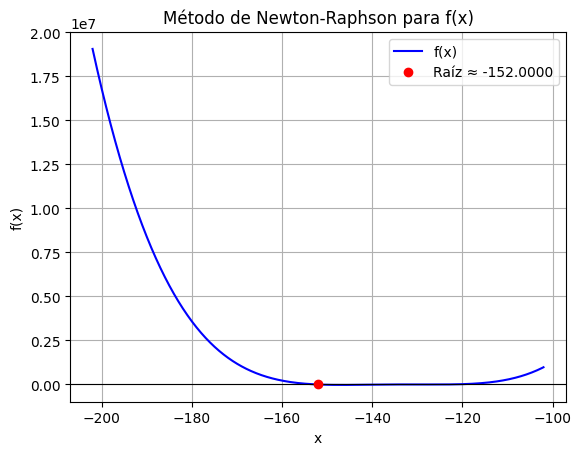

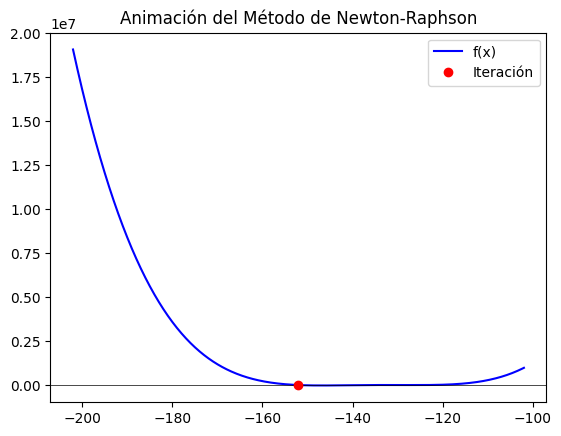

In [ ]:
from scipy.optimize import newton
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def fprime(x):
    return 4*x**3 + 3*540*x**2 + 2*109124*x + 9781632


if __name__ == "__main__":
    print("Método de Newton-Raphson\n")
    root = newton(f, x0=-600, fprime=fprime)
    print(f"Raíz encontrada: {root:.6f}")

   
    xs = np.linspace(root - 50, root + 50, 500)
    ys = f(xs)
    fig, ax = plt.subplots()
    ax.plot(xs, ys, label="f(x)", color="blue")
    ax.axhline(0, color="black", linewidth=0.8)
    ax.plot(root, f(root), "ro", label=f"Raíz ≈ {root:.4f}")
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.set_title("Método de Newton-Raphson para f(x)")
    ax.legend()
    ax.grid(True)
    plt.show()


    fig, ax = plt.subplots()
    ax.plot(xs, ys, color="blue", label="f(x)")
    ax.axhline(0, color="black", lw=0.5)
    point, = ax.plot([], [], "ro", label="Iteración")
    ax.legend()
    ax.set_title("Animación del Método de Newton-Raphson")

    iter_points = []

    def f_iter(x):
        """Versión de f(x) que guarda los valores evaluados por Newton."""
        if np.isscalar(x):
            iter_points.append(x)
        return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

    newton(f_iter, x0=-600, fprime=fprime)

    def actua(i):
        x = iter_points[i]
        point.set_data([x], [f(x)])
        return point,

    ani = animation.FuncAnimation(fig, actua, frames=len(iter_points),
                                  interval=800, blit=True, repeat=False)
    HTML(ani.to_jshtml())

    


2. Método de Bisección

In [ ]:
import numpy as np

def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def biseccion(a, b, tol=1e-4, max_iter=5000):
    if f(a) * f(b) >= 0:
        return None  

    for _ in range(max_iter):
        c = (a + b) / 2
        fc = f(c)

        if abs(fc) < tol or (b - a) / 2 < tol:
            return c  

        if f(a) * fc < 0:
            b = c
        else:
            a = c
    return None  


if __name__ == "__main__":
    print("Raices:\n")

   
    xs = np.linspace(-500, 0, 100)
    ys = [f(x) for x in xs]

    intervalos = [(xs[i], xs[i + 1]) for i in range(len(xs) - 1) if ys[i] * ys[i + 1] < 0]

    print("Intervalos:")
    for a, b in intervalos:
        print(f"({a:.4f}, {b:.4f})")

    
    for (a, b) in intervalos:
        raiz = biseccion(a, b)
        if raiz:
            print(f"Raíz aproximada encontrada en ({a:.4f}, {b:.4f}): {raiz:.6f}")
        else:
            print(f"No se encontró raíz en ({a:.4f}, {b:.4f}).")

Raices:

Intervalos:
(-156.5657, -151.5152)
(-136.3636, -131.3131)
Raíz aproximada encontrada en (-156.5657, -151.5152): -151.999965
Raíz aproximada encontrada en (-136.3636, -131.3131): -135.999969


3. Método de la Secante

In [15]:
from scipy.optimize import newton
import numpy as np

def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

if __name__ == "__main__":
    print("Secante\n")

    root = newton(f, x0=-160, x1=-140)
    print(f"\nRaíz encontrada: {root:.6f}")


Secante


Raíz encontrada: -136.000000


## Ejercicio 2

Encuentre todos los puntos en los que la curva
$\left(\dfrac{y}{2}\right)^2=\left(\dfrac{x+3}{2}\right)^2-1$
interseca el eje $y=-2$.

- Desarrollo

Sustituyendo $y = -2$ en la ecuación:

$$(\frac{-2}{2})^2 = (\frac{x+3}{2})^2 - 1$$
$$-1^2 = (\frac{x+3}{2})^2 - 1$$
$$2 = (\frac{x+3}{2})^2 $$
$$8 = (x+3)^2 $$
$$(x+3)^2 - 8 $$

Al tener esta función, y encontrar sus raices nos permitira obtener los puntos de intersección en el eje y = -2

In [19]:
def g(x):
    return  (x + 3)**2 - 8

def gprime(x):
    return 2*(x + 3)

In [20]:
# Método de Newton
raices_newton = []
estimaciones = [-50, -40, -30- 20, -10, 0]
for valor in estimaciones:
    try:
        raiz_newton = newton(g, valor, gprime)
        raiz_newton = round(raiz_newton, 4)
        if raiz_newton not in raices_newton:
            raices_newton.append(raiz_newton)
            print(f'Raíz cerca de {valor}: {raiz_newton}')
            continue
    except RuntimeError:
        print(f'No se encontró raíz con Newton cerca de {valor}')


Raíz cerca de -50: -5.8284
Raíz cerca de 0: -0.1716


In [23]:
# Método de la bisección
x = np.linspace(-50, 0, 1000)
chan = []

for i in range(len(x)-1):
    if g(x[i]) * g(x[i+1]) < 0:
        chan.append((round(x[i],4), round(x[i+1],4)))

print("Cambio de signo en intervalos:", chan)



Cambio de signo en intervalos: [(np.float64(-5.8559), np.float64(-5.8058)), (np.float64(-0.2002), np.float64(-0.1502))]


In [26]:
from scipy.optimize import bisect
raices_bisect = []
for a,b in chan:
    raiz_bisect = bisect(g, a, b)
    raiz_bisect = round(raiz_bisect, 4)
    if raiz_bisect not in raices_bisect:
        raices_bisect.append(raiz_bisect)
        print(f'Raíz encontrada en el intervalo ({a}, {b}): {raiz_bisect}')

Raíz encontrada en el intervalo (-5.8559, -5.8058): -5.8284
Raíz encontrada en el intervalo (-0.2002, -0.1502): -0.1716


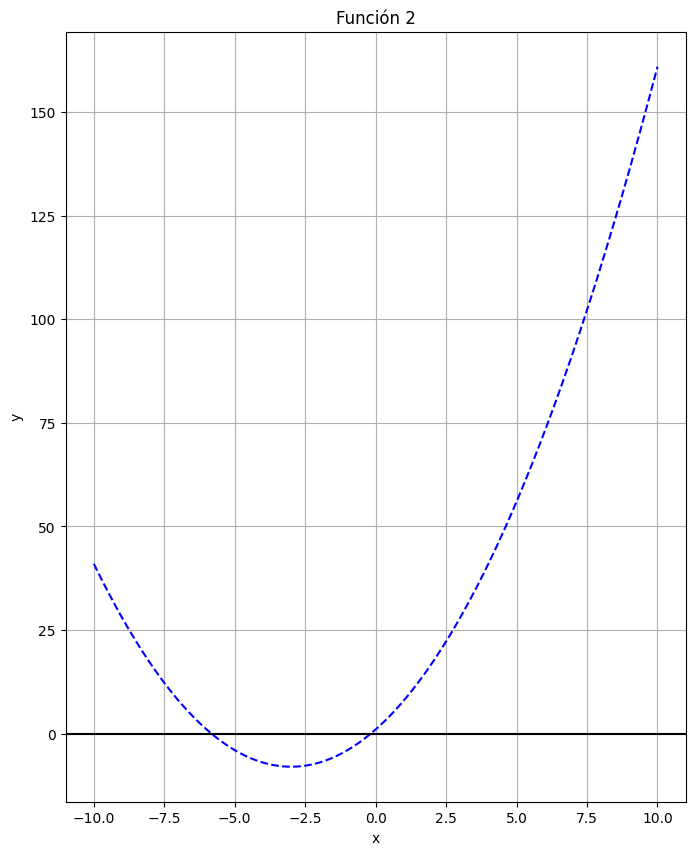

In [27]:
# Gráfica
x = np.linspace(-10, 10, 1000)
y = g(x)
plt.figure(figsize=(8,10))
plt.plot(x, y, color='blue', linestyle='--')
plt.title('Función 2')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black')
plt.grid(True)
plt.show()

## Ejercicio 3

Dada la función $f(x)=\dfrac{\sin x}{x}$, ¿a partir de qué valor $x_T$ se cumple que
$f(x)<0.015,\ \forall x\ge x_T$?

Sabemos que el seno de un número real siempre se encuentra en el intervalo 

$-1 \leq \sin(x) \leq 1$.

Al dividir toda la desigualdad entre $x$, obtenemos:

$\dfrac{-1}{x} \leq \dfrac{\sin(x)}{x} \leq \dfrac{1}{x}$.


El objetivo es determinar un valor $x_T$ tal que se cumpla la condición

$\dfrac{1}{x_T} < 0.015$ para todo $x \geq x_T$.


De este modo, encontramos que el valor de $x_T$ que satisface la desigualdad es aproximadamente

$x_T \approx 66.6666$.

In [28]:
def f(x):
    if x == 0:
        return 1.0
    return np.sin(x)/x

def fprime(x):
    return (x*np.cos(x) - np.sin(x)) / x**2

def g(x):
    return f(x) - 0.015

In [29]:
#Newton
estimado = 65
xT_newton = newton(g, estimado, fprime=fprime)

print("x_T encontrado con Newton =", xT_newton)

x_T encontrado con Newton = 64.64928510431074


In [30]:
#Bisección
x = np.linspace(10, 80, 100)
cambios = []

for i in range(len(x)-1):
    if g(x[i]) * g(x[i+1]) < 0:
        cambios.append((round(x[i],4), round(x[i+1],4)))

print("Intervalos con cambio de signo:", cambios)

Intervalos con cambio de signo: [(np.float64(12.1212), np.float64(12.8283)), (np.float64(14.9495), np.float64(15.6566)), (np.float64(18.4848), np.float64(19.1919)), (np.float64(21.3131), np.float64(22.0202)), (np.float64(24.8485), np.float64(25.5556)), (np.float64(27.6768), np.float64(28.3838)), (np.float64(31.2121), np.float64(31.9192)), (np.float64(33.3333), np.float64(34.0404)), (np.float64(38.2828), np.float64(38.9899)), (np.float64(39.697), np.float64(40.404)), (np.float64(44.6465), np.float64(45.3535)), (np.float64(46.0606), np.float64(46.7677)), (np.float64(51.0101), np.float64(51.7172)), (np.float64(52.4242), np.float64(53.1313)), (np.float64(57.3737), np.float64(58.0808)), (np.float64(58.0808), np.float64(58.7879)), (np.float64(63.7374), np.float64(64.4444)), (np.float64(64.4444), np.float64(65.1515))]


In [33]:
raices_bisect = []
for a,b in cambios:
    raiz_bisect = bisect(g, a, b)
    raiz_bisect = round(raiz_bisect, 4)
    if raiz_bisect not in raices_bisect:
        raices_bisect.append(raiz_bisect)
        
x = max(raices_bisect)
print("x encontrado con Bisección =", x)

x encontrado con Bisección = 64.6493


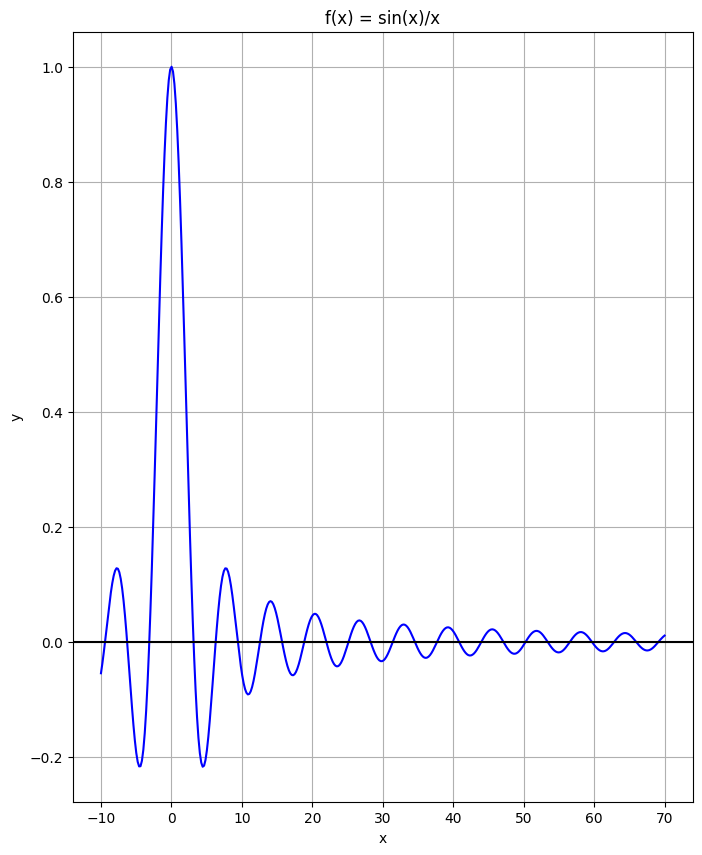

In [34]:
#Gráfico
x = np.linspace(-10, 70, 400)
y = np.sin(x)/x
plt.figure(figsize=(8,10))
plt.plot(x, y, color='blue')
plt.title('f(x) = sin(x)/x')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black')
plt.grid(True)
plt.show()

---
## Escribir las diferencias con el método de Newton y/o Bisección y Secante.

1. Velocidad
Newton es el más rápido porque converge de forma cuadrática. La Secante es intermedia con convergencia superlineal. Bisección es el más lento porque solo reduce el error a la mitad cada vez.
2. Aplicación
Newton necesita calcular la derivada f'(x), lo cual a veces es complicado. La Secante solo pide dos puntos iniciales y aproxima la derivada. Bisección requiere un intervalo donde la función cambie de signo.
3. Confiabilidad
Bisección siempre funciona si tienes el intervalo correcto. Newton y Secante pueden fallar si se elige mal los puntos iniciales o si la función se comporta raro cerca de la raíz.
